In [54]:
import numpy as np
import math

In [56]:
alph = float(input("Введите alpha: "))
N = int(input("Введите N: "))
h = 1.0/N
print("N =", N, ", h =", h, ", alpha =", alph)  

Введите alpha: 1
Введите N: 100
N = 100 , h = 0.01 , alpha = 1.0


In [57]:
#u_{i+1} через u_i и u_{i-1}

def u_next(u_prev, u_curr, h, alph, i):
    return 2*u_curr + (u_curr*h**2) / (1 + 2*abs(u_curr)) - u_prev - alph*math.exp(i*h)*h**2

In [58]:
#u_{i+1} = g(t)

def g(t):
    u_prev, u_curr = 0, t
    for i in range(1, N):
        u_prev, u_curr = u_curr, u_next(u_prev, u_curr, h, alph, i)
    return u_curr

In [59]:
#производная g в точке t

def drv(g, t):
    dlt = 10**(-10)
    return (g(t)-g(t-dlt)) / dlt

In [60]:
#метод Ньютона

def newton(g):
    eps = 10**(-10)
    t = 0
    while abs(g(t)) > eps:
        t = t - g(t)/drv(g, t)
    return t

In [61]:
# u_1

t = newton(g)
t, g(t)

(0.01008281133113757, -7.147663938587151e-11)

In [62]:
#Вычисляем u

u = np.zeros(N+1)
u[0], u[1] = 0, t
for i in range(2, N+1):
    u[i] = u_next(u[i-2], u[i-1], h, alph, i-1)
#u

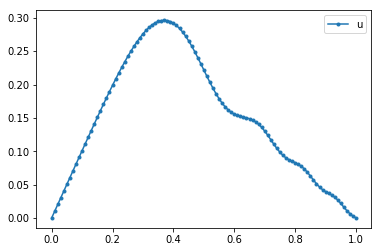

In [63]:
#Графики

from matplotlib import pyplot

net = np.arange(N+1)

pyplot.plot(net*h, u, label = "u", marker='.')
pyplot.legend()
pyplot.show()